## Simpsons characters classification 

In this notebook we try to classify images of different simpsons characters. The characters are 'abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'homer_simpson', 'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'principal_skinner' and 'sideshow_bob'.
This dataset was preprocessed in an other notebook, it is splitted into a train val and testset and resized into 80x80 pixels and all characters have more than 600 images in total. The whole dataset with the original size can be found here https://www.kaggle.com/alexattia/the-simpsons-characters-dataset. 

#### Imports

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import os

In [0]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical


In [36]:
os.getcwd()


'/content'

In [8]:
Data=pd.read_csv("/content/drive/My Drive/Data.csv")

X_train=np.load("/content/drive/My Drive/X_train.npy")
Y_train=np.load("/content/drive/My Drive/Y_train.npy")

X_val=np.load("/content/drive/My Drive/X_val.npy")
Y_val=np.load("/content/drive/My Drive/Y_val.npy")

X_test=np.load("/content/drive/My Drive/X_test.npy")
Y_test=np.load("/content/drive/My Drive/Y_test.npy")

labels=Data["label"].unique()

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(9637, 80, 80, 3)
(4131, 80, 80, 3)
(3442, 80, 80, 3)
(9637, 14)
(4131, 14)
(3442, 14)


Let's use the trainset to plot a random image of each character. You can see that the characters are easy recognizable. And all images are the same size.

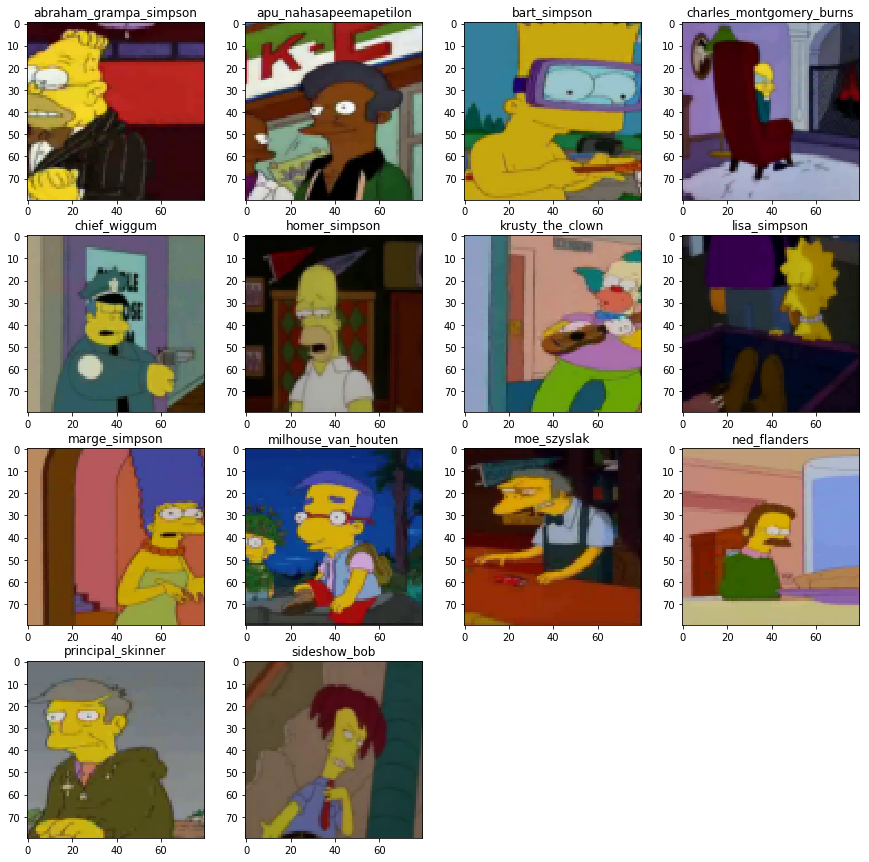

In [9]:
plt.figure(figsize=(15,15))
for i in range(0,len(np.unique(np.argmax(Y_train,axis=1)))):
    rmd=np.random.choice(np.where(np.argmax(Y_train,axis=1)==i)[0],1)
    plt.subplot(4,4,i+1)
    img=X_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(labels[i])

In this cell we plot the label distribution of all sets. You clearly see that the label distribution in all sets is very similar. The biggest class in the trainigset is obviously homer and the smallest class is apu.

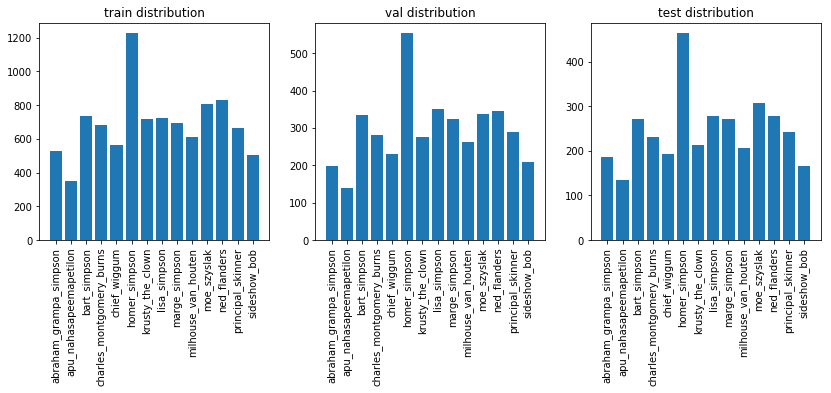

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.bar(np.unique(np.argmax(Y_train,axis=1),return_counts=True)[0],np.unique(np.argmax(Y_train,axis=1),return_counts=True)[1]
       ,tick_label=labels )
plt.xticks(rotation=90)
plt.title("train distribution")
plt.subplot(1,3,2)
plt.bar(np.unique(np.argmax(Y_val,axis=1),return_counts=True)[0],np.unique(np.argmax(Y_val,axis=1),return_counts=True)[1]
       ,tick_label=labels )
plt.xticks(rotation=90)
plt.title("val distribution")
plt.subplot(1,3,3)
plt.bar(np.unique(np.argmax(Y_test,axis=1),return_counts=True)[0],np.unique(np.argmax(Y_test,axis=1),return_counts=True)[1]
       ,tick_label=labels )
plt.xticks(rotation=90)
plt.title("test distribution")
plt.show()

### CNN

Now we normalize the data and use a CNN to classify the images into the right simpson character.

In [0]:
X_train=np.array(X_train,dtype="float32")
X_train=((X_train/255)-0.5)*2

X_val=np.array(X_val,dtype="float32")
X_val=((X_val/255)-0.5)*2

X_test=np.array(X_test,dtype="float32")
X_test=((X_test/255)-0.5)*2

In [26]:

model  =  Sequential()

model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(80,80,3)))
model.add(Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(14))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 80, 80, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 80, 80, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 40, 40, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 40, 40, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 20, 64)       

In [0]:

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
fill_mode="constant",
cval=255,horizontal_flip=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


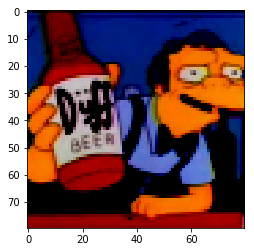

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

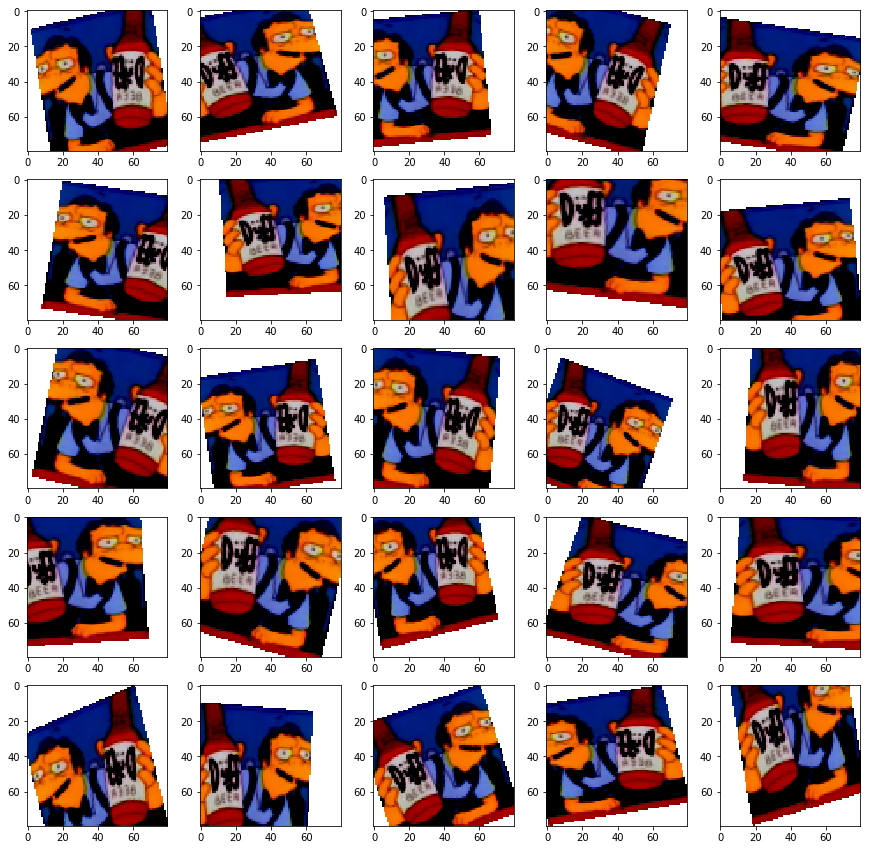

In [28]:
i=22
data_aug=datagen.flow(x=X_train[i:(i+1)], y=Y_train[i:(i+1)], batch_size=1)
plt.imshow(X_train[i])
plt.show()
plt.figure(figsize=(15,15))
for i in range (0,25):
  plt.subplot(5,5,i+1)
  x_aug,y_aug=next(data_aug)
  plt.imshow(x_aug[0,:,:,:])

In [29]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=len(X_train)/32, epochs=150, validation_data=(X_val, Y_val),verbose=2)


Epoch 1/150
Epoch 1/150
4131/301 - 2s - loss: 2.4969 - acc: 0.1421
302/301 - 20s - loss: 2.6148 - acc: 0.1297 - val_loss: 2.5107 - val_acc: 0.1421
Epoch 2/150
Epoch 1/150
4131/301 - 2s - loss: 2.0154 - acc: 0.2559
302/301 - 18s - loss: 2.3144 - acc: 0.2072 - val_loss: 2.1595 - val_acc: 0.2559
Epoch 3/150
Epoch 1/150
4131/301 - 2s - loss: 1.5030 - acc: 0.4132
302/301 - 18s - loss: 1.9910 - acc: 0.3166 - val_loss: 1.7411 - val_acc: 0.4132
Epoch 4/150
Epoch 1/150
4131/301 - 2s - loss: 1.5722 - acc: 0.5374
302/301 - 18s - loss: 1.6910 - acc: 0.4329 - val_loss: 1.4417 - val_acc: 0.5374
Epoch 5/150
Epoch 1/150
4131/301 - 2s - loss: 0.6319 - acc: 0.6137
302/301 - 18s - loss: 1.4878 - acc: 0.5086 - val_loss: 1.1482 - val_acc: 0.6137
Epoch 6/150
Epoch 1/150
4131/301 - 2s - loss: 0.7743 - acc: 0.6684
302/301 - 18s - loss: 1.1639 - acc: 0.6266 - val_loss: 0.9962 - val_acc: 0.6684
Epoch 7/150
Epoch 1/150
4131/301 - 2s - loss: 0.3992 - acc: 0.7541
302/301 - 18s - loss: 0.9796 - acc: 0.6828 - val_lo

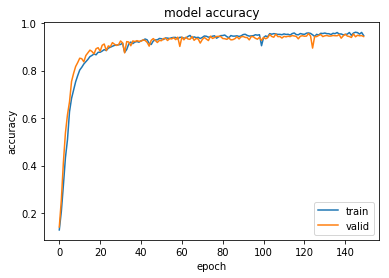

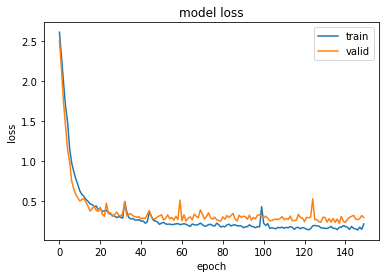

In [30]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [0]:
model.save("simpsons_cnn.h5")

In [42]:
model=load_model("simpsons_cnn.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Evaluate
Lets check the overall accuracy and the accuracy per class.
Note that we use also a method called test time augmentation, where we predict the same image over multiple different augmentation runs. For a final prediction for that image we average over all the runs.

In [43]:
acc=np.average(model.predict_classes(X_test)==np.argmax(Y_test,axis=1))
res = pd.DataFrame({'Acc' : acc}, index=['CNN'])
res

,Acc
CNN,0.936665


In [45]:
aug_size=40
tta_pred=np.zeros((len(X_test),14))
for i in tqdm(range(0,len(X_test))):
  tmp=np.zeros((aug_size,80,80,3))
  data_aug=datagen.flow(x=X_test [i:(i+1)], y=Y_test[i:(i+1)], batch_size=1)
  for j in range(0,aug_size):
    tmp[j],_=next(data_aug)
  tta_pred[i]=np.average(model.predict(tmp),axis=0)

In [46]:
acc=np.average(np.argmax(tta_pred,axis=1)==np.argmax(Y_test,axis=1))
res = pd.DataFrame({'Acc' : acc}, index=['CNN_tta'])
res


,Acc
CNN_tta,0.952063


In [47]:
for i in range(0,len(labels)):
  print(labels[i],np.average(np.argmax(tta_pred,axis=1)[np.where(np.argmax(Y_test,axis=1)==i)]==i))

abraham_grampa_simpson 0.9301075268817204
apu_nahasapeemapetilon 0.9481481481481482
bart_simpson 0.9558823529411765
charles_montgomery_burns 0.9523809523809523
chief_wiggum 0.9585492227979274
homer_simpson 0.9568965517241379
krusty_the_clown 0.9765258215962441
lisa_simpson 0.8960573476702509
marge_simpson 0.9520295202952029
milhouse_van_houten 0.9466019417475728
moe_szyslak 0.954248366013072
ned_flanders 0.978494623655914
principal_skinner 0.966804979253112
sideshow_bob 0.9518072289156626
